In [ ]:
import PIL # 10.1.0
from PIL import Image

print(PIL.__version__)

10.1.0


# Checkout Image

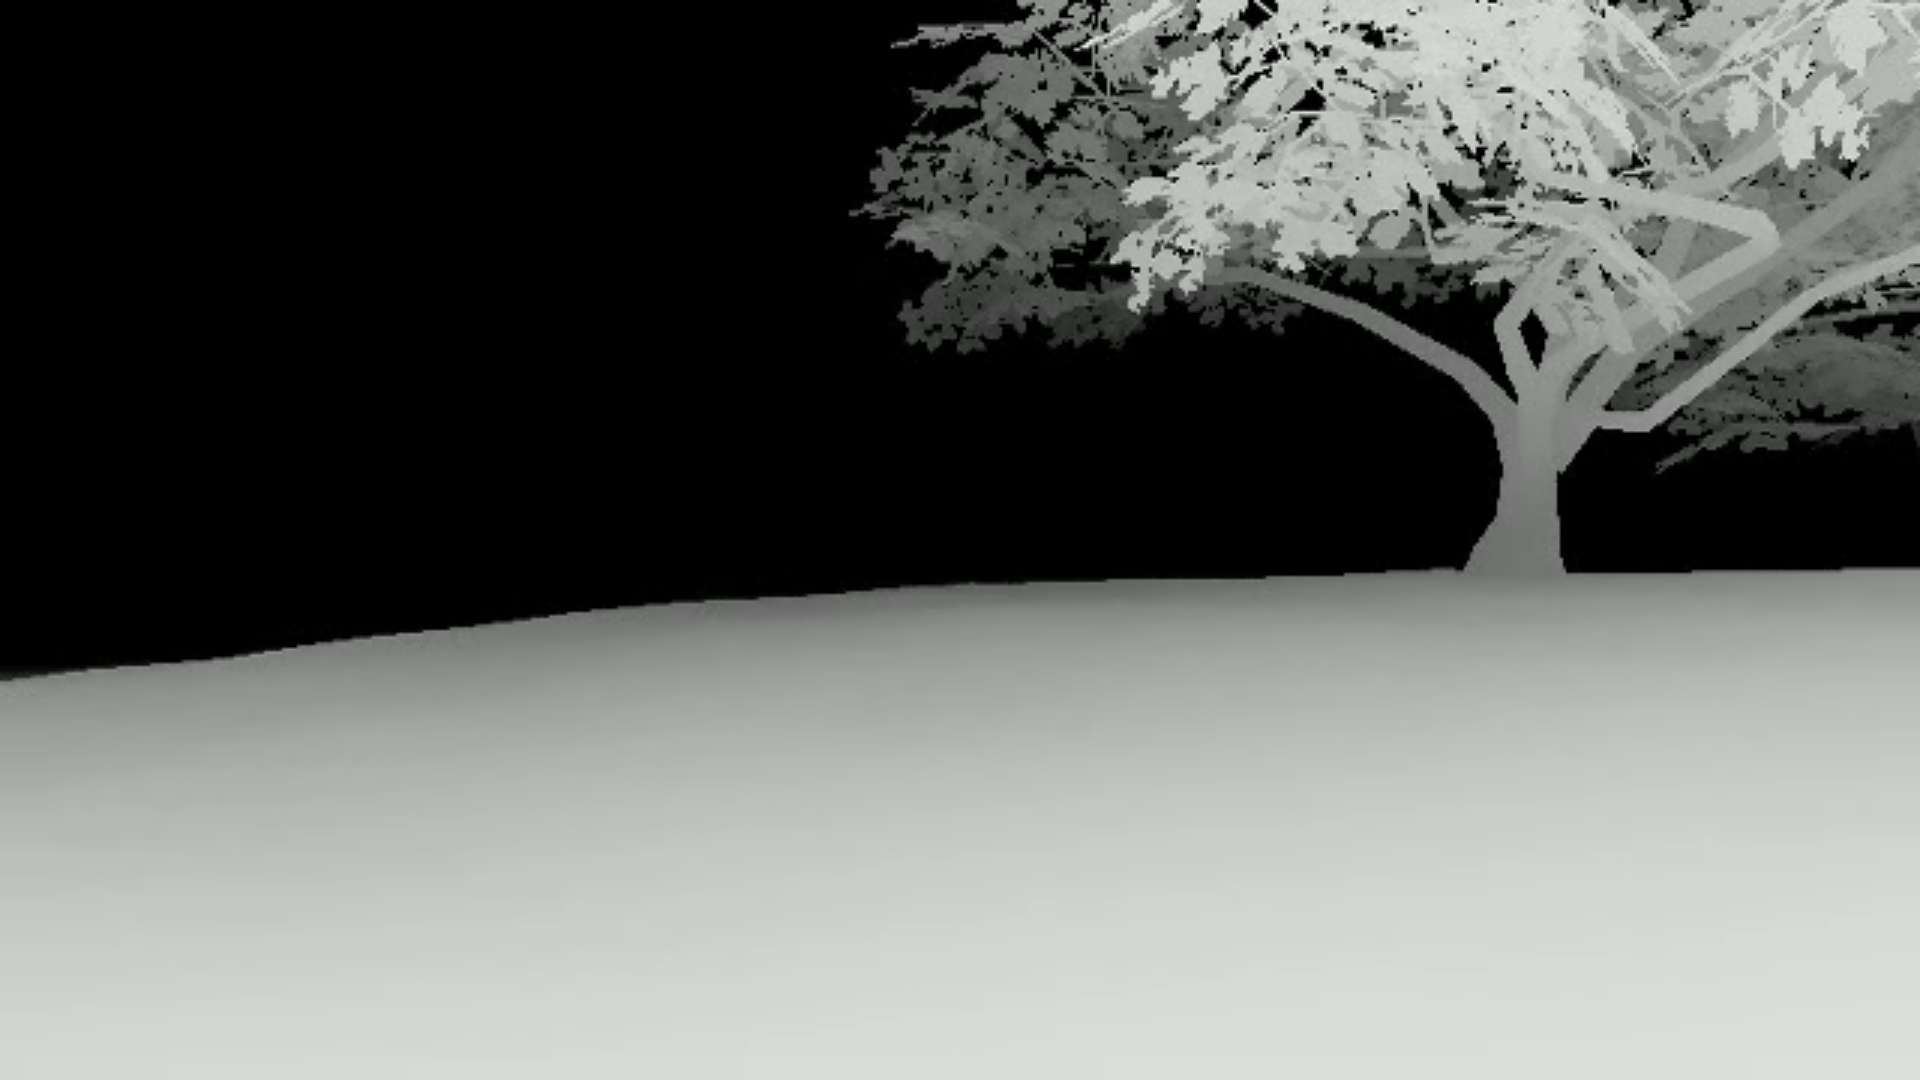

In [ ]:
data_folder = './data/'
img_loc = 'depth_img_sim.png'

im = Image.open(data_folder+img_loc, 'r')
im

# Load Image, Split up in Regions

In [ ]:
import numpy as np
from PIL import Image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Parameters
THRESHOLD = 60
GRID_SIZE = 10
# make a grid size x and y different

image_path = './data/depth_img_sim.png'
#image_path = './data/depth_img_sim.png'

# Open an image
image = Image.open(image_path)

# Get the size (width x height)
width, height = image.size

# If you want to convert the image to a NumPy array
image_array = np.array(image)

# Assuming you have an input image 'image' with shape (height, width, channels)
height, width, channels = image_array.shape
region_size = (height // GRID_SIZE, width // GRID_SIZE,
               1)  # Change the channels to 1

# Split the image into 3x3 regions and extract only the red channel
regions = [image_array[i * region_size[0]: (i + 1) * region_size[0],
                       j * region_size[1]: (j + 1) * region_size[1], 0]  # Select the red channel (index 0)
           for i in range(GRID_SIZE) for j in range(GRID_SIZE)]

# Convert the list of regions to a NumPy array
regions_array = np.array(regions)

In [ ]:
regions_array

array([[[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,  52,  35,  25],
        [  0,   0,   0, ...,  32,   5,   2],
        [  0,   0,   0, ...,  32,   5,   2]],

       [[  0,   0,   0, ..., 203, 204, 204],
        [  0,   0,   0, ..., 203, 204, 204],
        [  0,   0,   0, ..., 200, 202, 203],
        ...,
        [ 14,   3,  12, ...,  67,  68,  68],
        [  0,   0,   0, ...,  59,  60,  60],
        [  0,   0,   0, ...,  58,  58,  59]],

       ...,

       [[183, 183, 183, ..., 194, 194, 194],
        [183, 183, 183, ..., 194, 194, 194],
        [184, 184, 184, ..., 194, 194, 194

In [ ]:
state = []

for region in regions_array:
    region_value = np.max(region)
    #print(region_value)
    if region_value > THRESHOLD:
        state.append(1)
    else:
        state.append(0)
state

[0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

# Visualize state for humans

In [ ]:
for i, s in enumerate(state):
    #print(s)
    print(s, end=" ")
    if i % GRID_SIZE == GRID_SIZE-1:
        print()

len(state)

0 1 1 1 
0 1 1 1 
1 1 1 1 
1 1 1 1 


16

In [ ]:
regions_array[11]

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [201, 201, 201, ..., 204, 204, 204],
       [201, 201, 201, ..., 204, 204, 204],
       [201, 201, 201, ..., 204, 204, 204]], dtype=uint8)

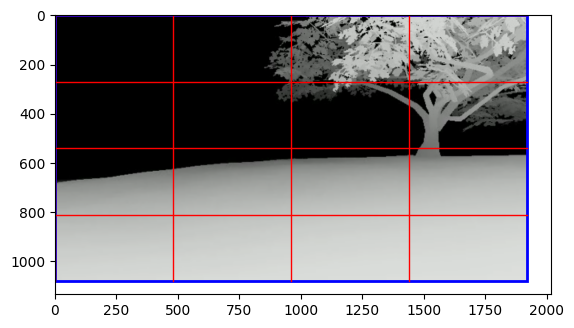

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import math

# Load an image using PIL (Python Imaging Library)
img = Image.open(image_path)

# Convert the image to a NumPy array
img_array = np.array(img)

# Plot the image
plt.imshow(img_array)

# Create a grid
grid_color = 'red'  # You can set the color of the grid lines
grid_size = round(image.width / 5)      # Set the size of the grid cells

# Get image dimensions
height, width, _ = img_array.shape

# Create grid lines
for i in range(0, width, round(image.width / GRID_SIZE)):
    plt.plot([i, i], [0, height], color=grid_color, linewidth=1)

for j in range(0, height, round(image.height / GRID_SIZE)):
    plt.plot([0, width], [j, j], color=grid_color, linewidth=1)

# Optionally, you can add a border around the entire image
border = patches.Rectangle((0, 0), width, height,
                           linewidth=2, edgecolor='blue', facecolor='none')
plt.gca().add_patch(border)

# Display the image with the grid
plt.show()

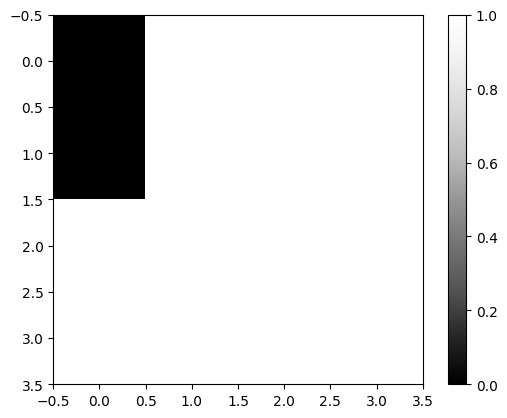

In [ ]:
def visualize_binary_array(binary_array, grid_size):
    # Convert the binary array to a 2D numpy array
    array_2d = np.array(binary_array).reshape(-1, GRID_SIZE)

    # Create a grey grid
    plt.imshow(array_2d, cmap='Greys_r', interpolation='nearest')
    plt.colorbar()
    plt.show()

visualize_binary_array(state, GRID_SIZE)

In [ ]:
regions_array

array([[[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       [[  0,   0,   0, ..., 126, 121, 129],
        [  0,   0,   0, ..., 126, 121, 129],
        [  0,   0,   0, ..., 130, 125, 140],
        ...,
        [  0,   0,   0, ...,  78,  75,  74],
        [  0,   0,   0, ...,  80,  75,  74],
        [  0,   0,   0, ...,  82,  76,  75]],

       ...,

       [[197, 197, 197, ..., 203, 203, 203],
        [197, 197, 197, ..., 203, 203, 203],
        [198, 198, 198, ..., 203, 203, 203